In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

In [5]:
L=10 #Longitud de la región cuadrada
h=0.1 #Distancia entre nodos

#Cálculo de voltaje al resolver el laplaciano
V_t=0
x=np.arange(0,10+h,h)
y=np.arange(0,10+h,h)
X, Y =np.meshgrid(x,y)
for i in range(112):
    A = 20/(np.pi*(2*i+1)*np.sinh((2*i+1)*np.pi))
    V_t += A * np.sin((2*i+1)*np.pi/10*X) * np.sinh(((2*i+1)*np.pi/10*Y))

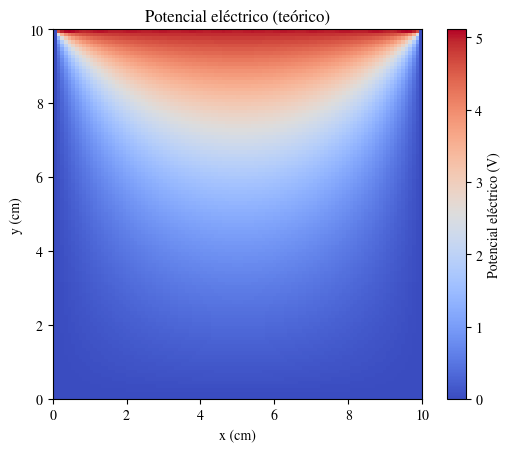

In [6]:
plt.figure()
plt.imshow(V_t, extent=[0, L, 0, L], origin='lower', cmap='coolwarm')
plt.colorbar(label='Potencial eléctrico (V)')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('Potencial eléctrico (teórico)')
plt.show()

In [7]:
#Cáculo de voltaje a partir de diferencias finitas
N=int(L/h+1)
V = np.zeros((N,N))
V[N-1,:]=5
Error = 0.001
Delta=float('inf')
counter=0
while Delta>Error:
    V_c=V.copy()
    for i in range(1,N-1):
        for j in range(1,N-1):
            V_cer=(V[i-1,j]+V[i+1,j]+V[i,j-1]+V[i,j+1])*0.25
            V_cer_l=(V[i-1,j-1]+V[i+1,j+1]+V[i+1,j-1]+V[i-1,j+1])*0.25
            V_c[i,j] = V_cer*2/3+V_cer_l*1/3
    if counter > 100:
        Delta = np.sum(np.abs((V_c[1:N-2,1:N-2] - V[1:N-2,1:N-2])/V[1:N-2,1:N-2]))/((N-2)*(N-2))
    V=V_c
    
    counter+=1

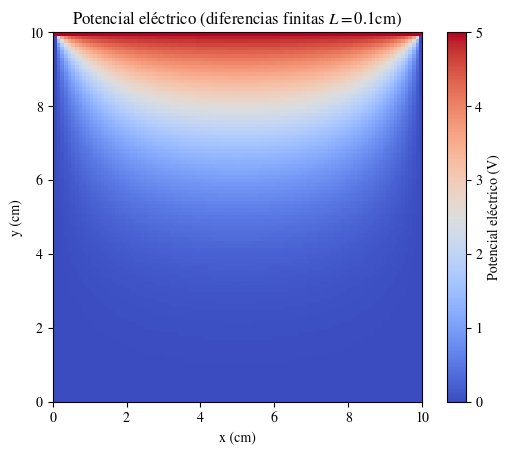

In [8]:
plt.figure()
plt.imshow(V, extent=[0, L, 0, L], origin='lower', cmap='coolwarm')
plt.colorbar(label='Potencial eléctrico (V)')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title(r'Potencial eléctrico (diferencias finitas $L={}$cm)'.format(h))
plt.show()

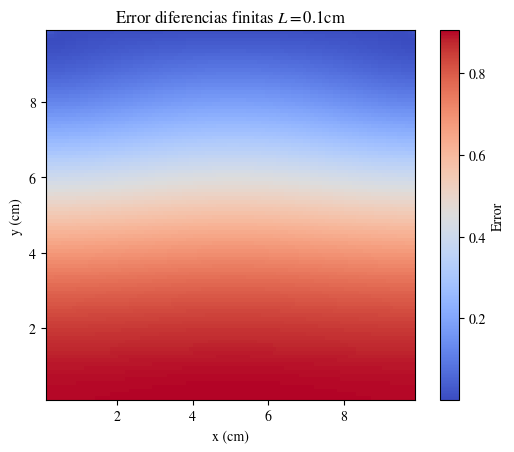

El error porcentual más alto es: 0.904


In [9]:
#Cálculo de error
error = abs((V[1:99,1:99]-V_t[1:99,1:99])/V_t[1:99,1:99])
plt.figure()
plt.imshow(error, extent=[h, L-h, h, L-h], origin='lower', cmap='coolwarm')
plt.colorbar(label=r'Error')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title(r'Error diferencias finitas $L=0.1$cm')
plt.show()
print('El error porcentual más alto es: ' + str(round(np.max(error),3)))

El error porcentual incrementa para valores de (X,Y) que se encuentran en Y<6. Note que en estos valores el error porcentual es mayor a 0.5. Para Y cercano a 0, el error porcentual alzanca el valor de 0.9. Por otra parte, no se realizó el cambio a L = 0.01cm para hacer la comparación, debido a que el tiempo de espera era demasiado alto.